#### Long Short Term Model
#### Sentiment Analysis with the IMDB movie reviews dataset

Original dataset sentiment counts:
Positive Reviews: 12500
Negative Reviews: 12500


C:\Users\baron\AppData\Local\Temp\ipykernel_17752\1173612480.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Negative", "Positive"], y=[negative_count, positive_count], palette="Blues")


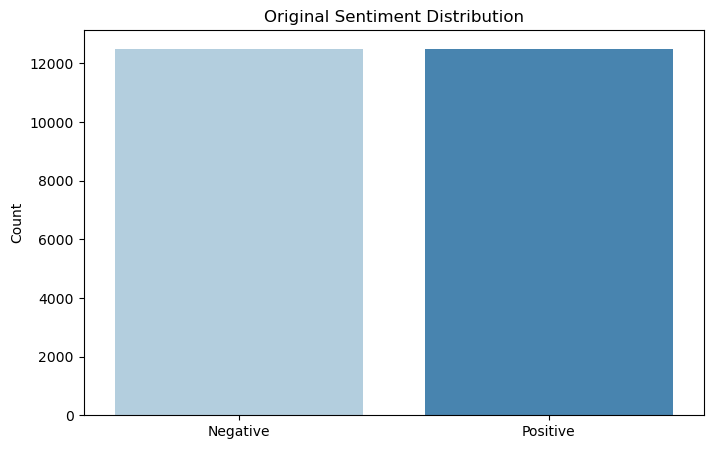

Added 2 new reviews.
After adding new reviews:
Positive Reviews: 12501
Negative Reviews: 12501


C:\Users\baron\AppData\Local\Temp\ipykernel_17752\1173612480.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Negative", "Positive"], y=[negative_count, positive_count], palette="Blues")


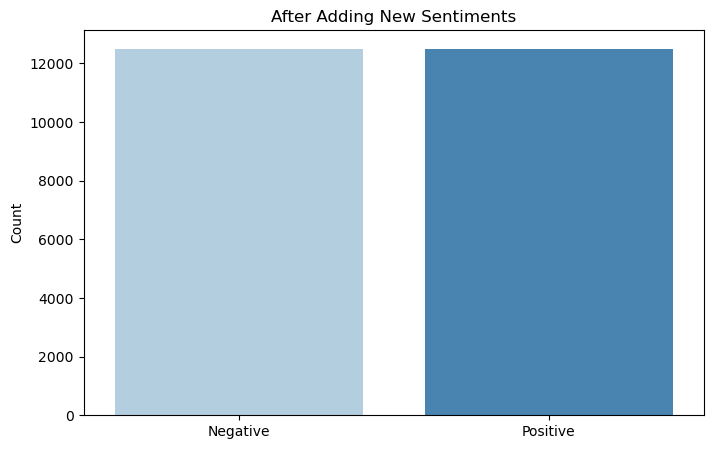

C:\Users\baron\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 401ms/step - accuracy: 0.6830 - loss: 0.5615 - val_accuracy: 0.8684 - val_loss: 0.3217
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.9079 - loss: 0.2477 - val_accuracy: 0.8650 - val_loss: 0.3182
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9412 - loss: 0.1643 - val_accuracy: 0.8542 - val_loss: 0.3457
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.9620 - loss: 0.1115 - val_accuracy: 0.8426 - val_loss: 0.4073
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9698 - loss: 0.0840 - val_accuracy: 0.8470 - val_loss: 0.5438


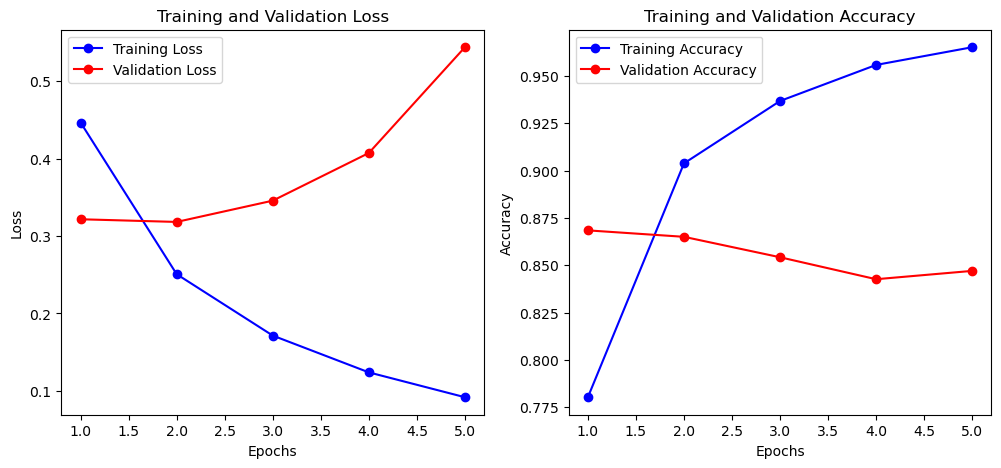

782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8458 - loss: 0.5699
Test Accuracy: 0.85
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step


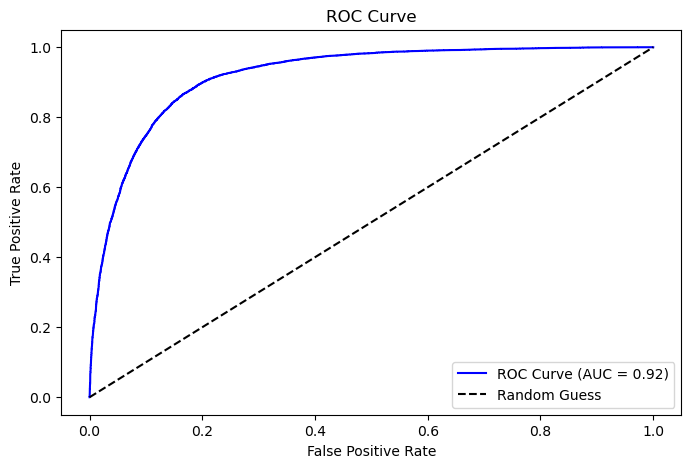

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, datasets, preprocessing, Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import numpy as np

# Step 1: Load and preprocess the IMDB dataset
def load_data():
    # Load the dataset with the top 10,000 words
    (train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)
    # Pad sequences to ensure they all have the same length
    train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=200)
    test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=200)
    return train_data, train_labels, test_data, test_labels

# Count positive and negative reviews
def count_sentiments(labels, title="Sentiment Distribution"):
    positive_count = np.sum(labels)
    negative_count = len(labels) - positive_count
    print(f"Positive Reviews: {positive_count}")
    print(f"Negative Reviews: {negative_count}")
    
    # Visualization: Sentiment distribution
    plt.figure(figsize=(8, 5))
    sns.barplot(x=["Negative", "Positive"], y=[negative_count, positive_count], palette="Blues")
    plt.title(title)
    plt.ylabel("Count")
    plt.show()

# Add new reviews and sentiments
def add_new_sentiments(train_data, train_labels, new_reviews, new_sentiments, word_index):
    # Convert new reviews to integer sequences
    new_reviews_encoded = [
        [word_index.get(word, 2) for word in review.lower().split()] for review in new_reviews
    ]
    # Pad the sequences
    new_reviews_padded = preprocessing.sequence.pad_sequences(new_reviews_encoded, maxlen=200)
    # Append to training data and labels
    train_data = np.vstack([train_data, new_reviews_padded])
    train_labels = np.hstack([train_labels, new_sentiments])
    print(f"Added {len(new_reviews)} new reviews.")
    return train_data, train_labels

# Step 2: Build the LSTM model
def create_lstm_model():
    model = Sequential([
        layers.Embedding(input_dim=10000, output_dim=64, input_length=200),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Step 3: Train the LSTM model
def train_model(model, train_data, train_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_data, train_labels,
                        epochs=5, batch_size=64, validation_split=0.2)
    return history

# Visualize training history
def plot_training_history(history):
    # Visualization: Loss and accuracy curves
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Plot ROC Curve
def plot_roc_curve(model, test_data, test_labels):
    # Predict probabilities
    y_pred = model.predict(test_data).ravel()
    fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Visualization: ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Main workflow
if __name__ == "__main__":
    # Load data
    train_data, train_labels, test_data, test_labels = load_data()

    # Count sentiments
    print("Original dataset sentiment counts:")
    count_sentiments(train_labels, title="Original Sentiment Distribution")

    # Add new sentiments
    word_index = datasets.imdb.get_word_index()
    new_reviews = [
        "This movie was fantastic and thrilling",
        "I didn't like the movie; it was boring and slow"
    ]
    new_sentiments = [1, 0]  # 1 = Positive, 0 = Negative
    train_data, train_labels = add_new_sentiments(train_data, train_labels, new_reviews, new_sentiments, word_index)

    # Count sentiments again
    print("After adding new reviews:")
    count_sentiments(train_labels, title="After Adding New Sentiments")

    # Build and train the model
    lstm_model = create_lstm_model()
    history = train_model(lstm_model, train_data, train_labels)

    # Plot training history
    plot_training_history(history)

    # Evaluate the model
    test_loss, test_accuracy = lstm_model.evaluate(test_data, test_labels)
    print(f"Test Accuracy: {test_accuracy:.2f}")
    
    # Plot ROC curve
    plot_roc_curve(lstm_model, test_data, test_labels)
